## Data Preparation

In [1]:
## dependencies

## Install pandas and openpyxl 
# !pip install pandas
# !pip install openpyxl

In [106]:
import pandas as pd

col_keeps = {'%x (distance from pylorus side)':'%x', '%y (distance from bottom)':'%y',
             'Average IGLE Area (um²)':'area', 'Area Of Innervation':'area', 
             'Neuron Area Of Innervation (um²) -Convex Hull':'area'}

## setup maximimum x and y width
min_z, max_z = 0, 36.7
min_y, max_y = 24.6, 0

def load_data(data_name):
    df = pd.read_excel(data_name)
    # remove unnecessary columns
    for col in df.columns:
        if col in col_keeps:
            df.rename(columns = {col:col_keeps[col]}, inplace = True)
        else:
            df.drop(col, axis=1, inplace=True)
    df['y'] = df['%y']/(max(df['%y'])-min(df['%y']))*(max_y-min_y) + min_y
    df['z'] = df['%x']/(max(df['%x'])-min(df['%x']))*(max_z-min_z) + min_z
    df['-%y'] = 100 - df['%y']
    # change the area to mm
    return df

In [107]:
df_igle = load_data('IGLE_data.xlsx')
df_ima = load_data('IMA_analyzed_data.xlsx')
df_efferent = load_data('Efferent_data.xlsx') 

In [98]:
df_igle

,%x,%y,area,y,z
0,47.011740,44.245348,3601.328000,10.268603,21.063648
1,25.346852,18.745693,1117.563755,18.528131,11.356678
2,14.300961,30.530669,2687.019182,14.710889,6.407557
3,23.319104,71.467953,1003.785793,1.450998,10.448143
4,59.124867,81.047553,1610.401750,-1.651906,26.490945
...,...,...,...,...,...
119,28.441836,50.999311,1401.684735,8.080944,12.743388
120,37.406617,56.719504,1940.776625,6.228131,16.760065
121,4.909285,59.476223,1663.673167,5.335209,2.199609
122,30.522946,41.212957,774.539864,11.250817,13.675831


In [99]:
df_ima

,%x,%y,area,y,z
0,28.311966,76.515152,817167,3.197807,10.860413
1,55.876068,16.666667,4866190,19.938136,21.433948
2,67.841880,61.019284,1679230,7.532185,26.024009
3,65.331197,27.410468,12166100,16.932968,25.060916
4,66.666667,21.487603,5587230,18.589663,25.573199
...,...,...,...,...,...
179,12.339744,79.132231,318208,2.465779,4.733501
180,6.250000,81.955923,969304,1.675959,2.397487
181,7.852564,65.151515,1742690,6.376351,3.012228
182,10.416667,86.294766,1302170,0.462334,3.995812


In [100]:
df_efferent

,%x,%y,area,y,z
0,60.224239,36.319779,7741950,11.927273,26.085444
1,27.549386,27.498277,66214800,15.005279,11.932703
2,15.589963,64.093728,18164900,2.236364,6.752615
3,70.528564,86.560992,11690200,-5.602933,30.548645
4,78.964229,83.459683,5014350,-4.520821,34.202457
...,...,...,...,...,...
126,66.631073,46.864232,46065100,8.248094,28.860491
127,89.375334,37.491385,22406100,11.518475,38.711909
128,NaN,NaN,21864200,NaN,NaN
129,NaN,NaN,15575000,NaN,NaN


In [87]:
import matplotlib as plt

<AxesSubplot:xlabel='-%y', ylabel='%x'>

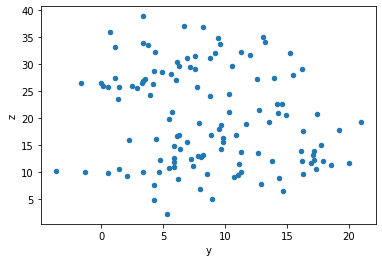

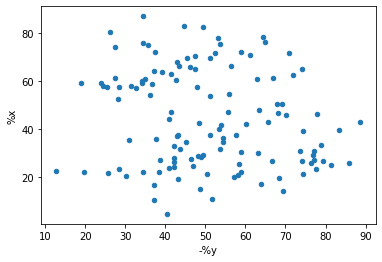

In [108]:
df_igle.plot.scatter(x='y',y='z')
df_igle.plot.scatter(x='-%y',y='%x')

<AxesSubplot:xlabel='-%y', ylabel='%x'>

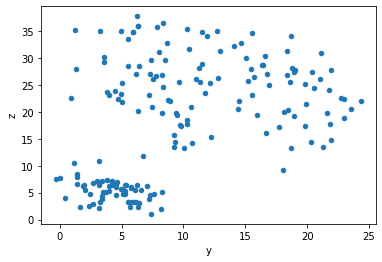

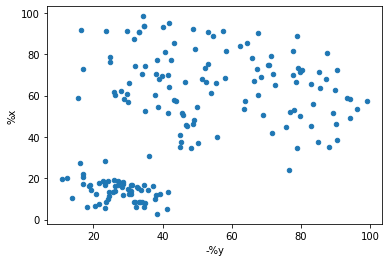

In [110]:
df_ima.plot.scatter(x='y',y='z')
df_ima.plot.scatter(x='-%y',y='%x')

<AxesSubplot:xlabel='-%y', ylabel='%x'>

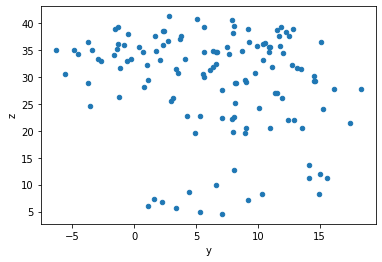

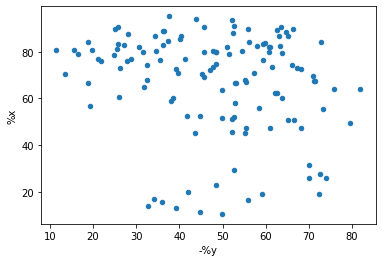

In [111]:
df_efferent.plot.scatter(x='y',y='z')
df_efferent.plot.scatter(x='-%y',y='%x')